In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("puchkov.k@phystech.edu.csv", header=None)[0]

In [3]:
data.describe()

count    20.000000
mean      0.119889
std       1.059960
min      -2.217277
25%      -0.557736
50%       0.312646
75%       0.853779
max       2.323082
Name: 0, dtype: float64

In [4]:
data.sample(5)

0    -1.154067
11   -0.851056
15    1.232222
12   -1.206982
17    0.389572
Name: 0, dtype: float64

Применим ли t-критерий для проверки равенства среднего нулю для данной выборки?

/home/hp/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='0', ylabel='Density'>

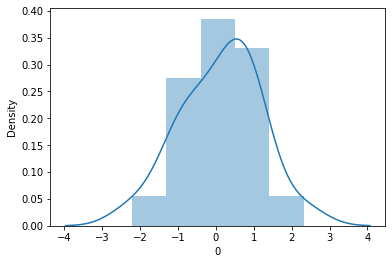

In [5]:
import seaborn as sns
sns.distplot(data)

In [6]:
import scipy.stats as st
st.shapiro(data)

ShapiroResult(statistic=0.9741803407669067, pvalue=0.8394817113876343)

p-value для критерия знаковых рангов Уилкоксона ($m_0=0$) 

In [7]:
st.wilcoxon(data)[1].round(2)

0.62

p-value для критерия знаков (m0=0)

In [8]:
from statsmodels.stats.descriptivestats import sign_test
sign_test(data)[1].round(2)

0.5

Рассмотрим **перестановочный критерий** для среднего.

In [9]:
# Сколько перестановок требуется рассмотреть для данной выборки?
2 ** data.count()

1048576

Рассмотрим перестановочный критерий для проверки среднего ($m_0=0.5$). Для какого количества перестановок статистика $T$ будет иметь значение меньшее или равное статистике для оригинальной выборки?

In [10]:
import itertools
import numpy as np

t = (data - 0.5)
T = np.sum(t)
count = 0
good = 0
for v in itertools.product([-1, 1], repeat=len(t)):
    count +=1
    stat = np.dot(t, v)
    if abs(T) <= abs(stat):
        good+=1
    
        
good

131686

Границы доверительного интервала для среднего выборки

In [11]:
from arch.bootstrap import IIDBootstrap

bs = IIDBootstrap(data)
bs.conf_int(np.mean, 1000, method='basic').round(2)

array([[-0.32],
       [ 0.6 ]])